In [1]:
import torch.nn as nn
import torch
import torchvision.transforms as transforms
import torchvision
import time
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
from sklearn.metrics import confusion_matrix
import pandas as pd
import os

In [2]:
def get_mean_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images,_ in loader:
        images_count_in_batch = images.size(0)
#         print(images.shape)
        images =images.view(images_count_in_batch,images.size(1),-1)
        mean+=images.mean(2).sum(0)
        std+=images.std(2).sum(0)
        total_images_count+=images_count_in_batch
    mean /= total_images_count
    std /= total_images_count
    return mean,std

In [3]:
def train_transform(dataset):
    train_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
    train_dataset=torchvision.datasets.ImageFolder(root=dataset,transform=train_transforms)
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
    mean,std=get_mean_std(train_loader)
    train_transforms = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
    ])
    data_set=torchvision.datasets.ImageFolder(root=dataset,transform=train_transforms)
    return data_set

In [4]:
train_dataset='../Datasets/dataset_2_classes/train/'
training_dataset=train_transform(train_dataset)

In [5]:
test_dataset='../Datasets/dataset_2_classes/test/'
testing_dataset=train_transform(test_dataset)

In [6]:
validate_dataset='../Datasets/dataset_2_classes/validate/'
validating_dataset=train_transform(validate_dataset)

In [7]:
lr = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4]
Batchs=[64]

In [8]:
def set_device():
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    return device

In [9]:
device=set_device()


In [10]:
from statistics import mean
best_accuracy=0.0
best_param=""
criterion = nn.CrossEntropyLoss()
lr_accuract_training=[]
lr_accuracy_val=[]
lr_loss_train=[]
lr_loss_val=[]

/Users/bhanuprakash/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bhanuprakash/miniforge3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Learning Rate: 1.000 
Batch Size: 64 
Epoch size: 50 
Epoch: 1 
Training Data: Epoch Loss: 2.804, Epoch Accuracy: 78.223, Validation Loss: 75286.416,Validation Accuracy: 72.948
Epoch: 2 
Training Data: Epoch Loss: 0.491, Epoch Accuracy: 81.152, Validation Loss: 123.716,Validation Accuracy: 72.948
Epoch: 3 
Training Data: Epoch Loss: 0.456, Epoch Accuracy: 81.152, Validation Loss: 9.824,Validation Accuracy: 72.948
Epoch: 4 
Training Data: Epoch Loss: 0.444, Epoch Accuracy: 81.152, Validation Loss: 0.537,Validation Accuracy: 72.948
Epoch: 5 
Training Data: Epoch Loss: 0.363, Epoch Accuracy: 81.836, Validation Loss: 0.342,Validation Accuracy: 85.714
Epoch: 6 
Training Data: Epoch Loss: 0.379, Epoch Accuracy: 79.688, Validation Loss: 1.265,Validation Accuracy: 82.827
Epoch: 7 
Training Data: Epoch Loss: 0.329, Epoch Accuracy: 82.227, Validation Loss: 0.467,Validation Accuracy: 72.948
Epoch: 8 
Training Data: Epoch Loss: 0.296, Epoch Accuracy: 82.520, Validation Loss: 1.079,Validation Accur

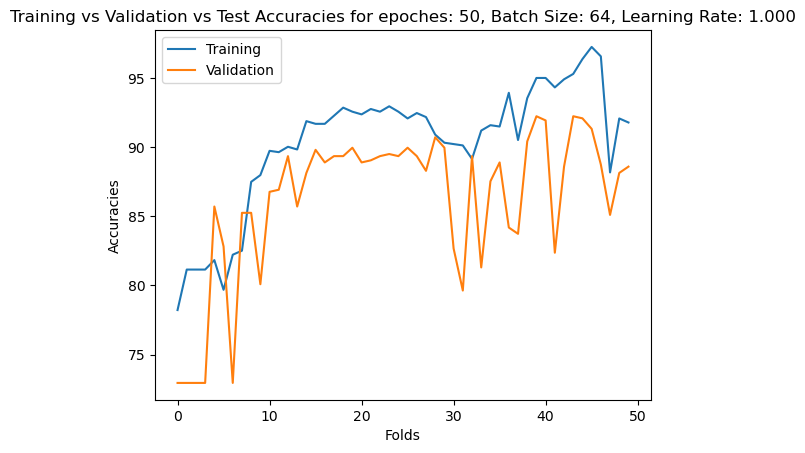

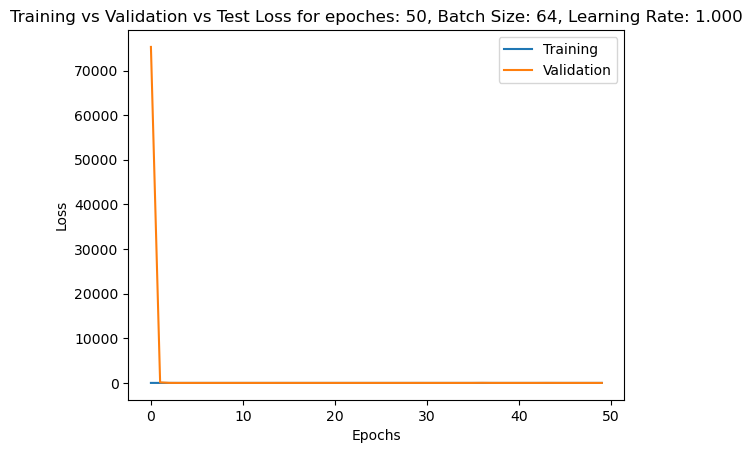

Learning Rate: 0.100 
Batch Size: 64 
Epoch size: 50 
Epoch: 1 
Training Data: Epoch Loss: 0.912, Epoch Accuracy: 76.562, Validation Loss: 10363.150,Validation Accuracy: 72.948
Epoch: 2 
Training Data: Epoch Loss: 0.411, Epoch Accuracy: 81.152, Validation Loss: 27.764,Validation Accuracy: 72.948
Epoch: 3 
Training Data: Epoch Loss: 0.340, Epoch Accuracy: 81.152, Validation Loss: 0.585,Validation Accuracy: 72.948
Epoch: 4 
Training Data: Epoch Loss: 0.251, Epoch Accuracy: 87.109, Validation Loss: 0.402,Validation Accuracy: 82.675
Epoch: 5 
Training Data: Epoch Loss: 0.187, Epoch Accuracy: 93.848, Validation Loss: 0.416,Validation Accuracy: 89.058
Epoch: 6 
Training Data: Epoch Loss: 0.196, Epoch Accuracy: 91.699, Validation Loss: 0.594,Validation Accuracy: 86.322
Epoch: 7 
Training Data: Epoch Loss: 0.164, Epoch Accuracy: 93.652, Validation Loss: 0.360,Validation Accuracy: 88.906
Epoch: 8 
Training Data: Epoch Loss: 0.124, Epoch Accuracy: 94.922, Validation Loss: 0.288,Validation Accura

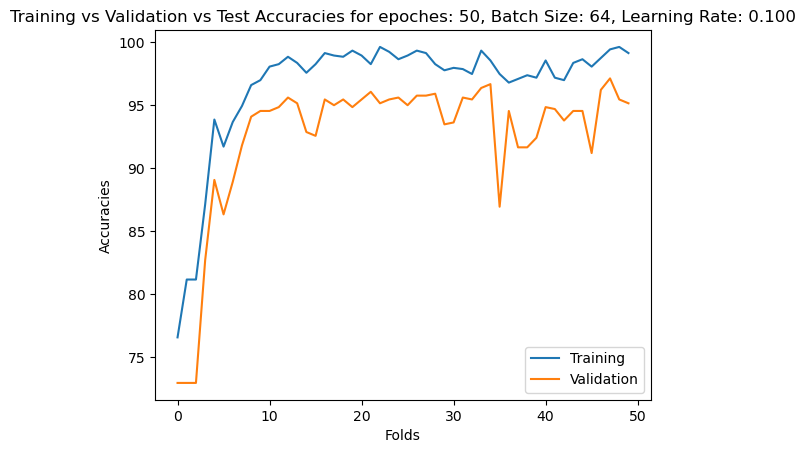

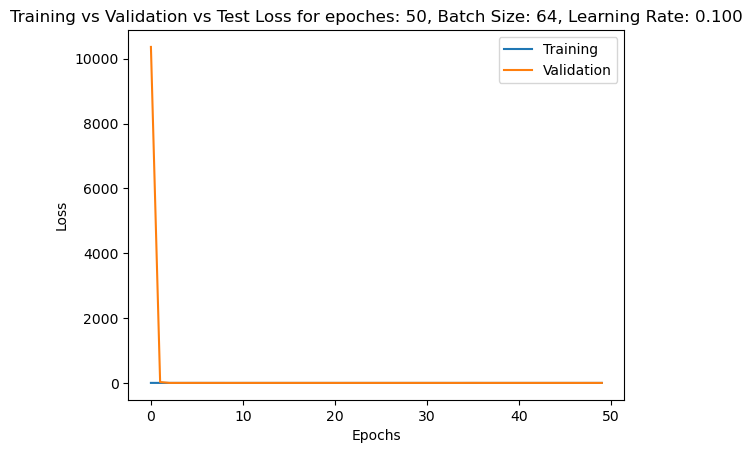

Learning Rate: 0.010 
Batch Size: 64 
Epoch size: 50 
Epoch: 1 
Training Data: Epoch Loss: 0.366, Epoch Accuracy: 85.547, Validation Loss: 1.126,Validation Accuracy: 73.100
Epoch: 2 
Training Data: Epoch Loss: 0.157, Epoch Accuracy: 94.629, Validation Loss: 8.935,Validation Accuracy: 36.474
Epoch: 3 
Training Data: Epoch Loss: 0.108, Epoch Accuracy: 95.703, Validation Loss: 1.628,Validation Accuracy: 81.307
Epoch: 4 
Training Data: Epoch Loss: 0.063, Epoch Accuracy: 97.266, Validation Loss: 0.400,Validation Accuracy: 84.802
Epoch: 5 
Training Data: Epoch Loss: 0.072, Epoch Accuracy: 97.363, Validation Loss: 0.245,Validation Accuracy: 93.161
Epoch: 6 
Training Data: Epoch Loss: 0.092, Epoch Accuracy: 96.680, Validation Loss: 0.619,Validation Accuracy: 84.650
Epoch: 7 
Training Data: Epoch Loss: 0.075, Epoch Accuracy: 96.973, Validation Loss: 0.252,Validation Accuracy: 91.489
Epoch: 8 
Training Data: Epoch Loss: 0.063, Epoch Accuracy: 97.559, Validation Loss: 0.209,Validation Accuracy: 9

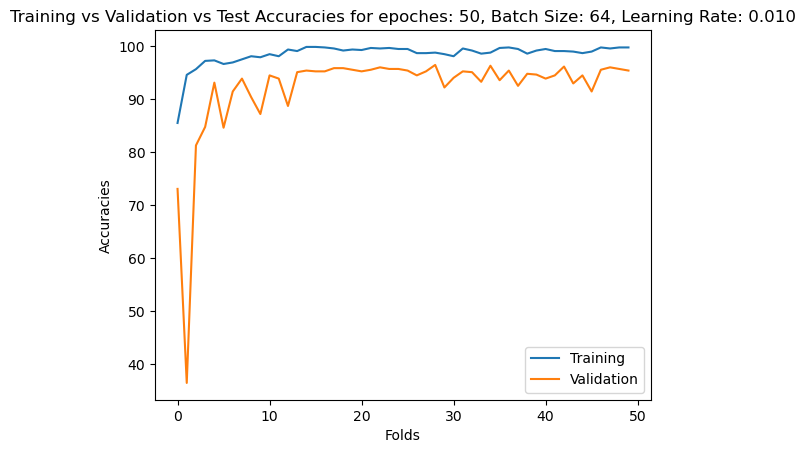

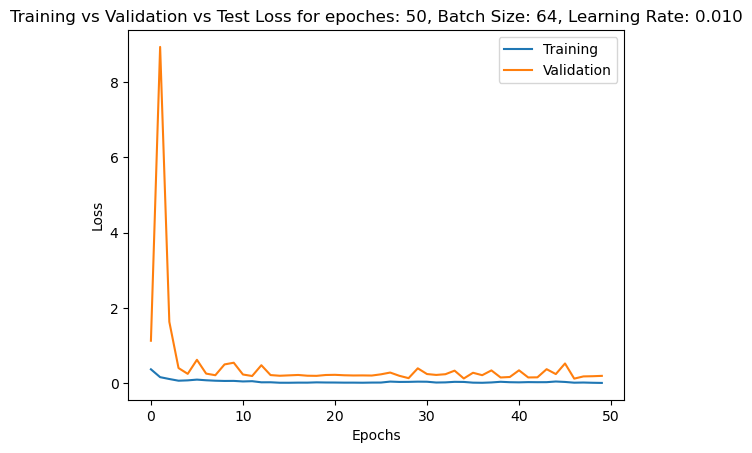

Learning Rate: 0.001 
Batch Size: 64 
Epoch size: 50 
Epoch: 1 
Training Data: Epoch Loss: 0.624, Epoch Accuracy: 71.777, Validation Loss: 0.538,Validation Accuracy: 72.948
Epoch: 2 
Training Data: Epoch Loss: 0.407, Epoch Accuracy: 81.152, Validation Loss: 0.515,Validation Accuracy: 72.948
Epoch: 3 
Training Data: Epoch Loss: 0.268, Epoch Accuracy: 89.746, Validation Loss: 0.297,Validation Accuracy: 88.450
Epoch: 4 
Training Data: Epoch Loss: 0.156, Epoch Accuracy: 95.801, Validation Loss: 0.242,Validation Accuracy: 91.185
Epoch: 5 
Training Data: Epoch Loss: 0.106, Epoch Accuracy: 97.168, Validation Loss: 0.210,Validation Accuracy: 92.097
Epoch: 6 
Training Data: Epoch Loss: 0.078, Epoch Accuracy: 97.559, Validation Loss: 0.165,Validation Accuracy: 93.769
Epoch: 7 
Training Data: Epoch Loss: 0.064, Epoch Accuracy: 98.242, Validation Loss: 0.137,Validation Accuracy: 94.529
Epoch: 8 
Training Data: Epoch Loss: 0.056, Epoch Accuracy: 98.145, Validation Loss: 0.190,Validation Accuracy: 9

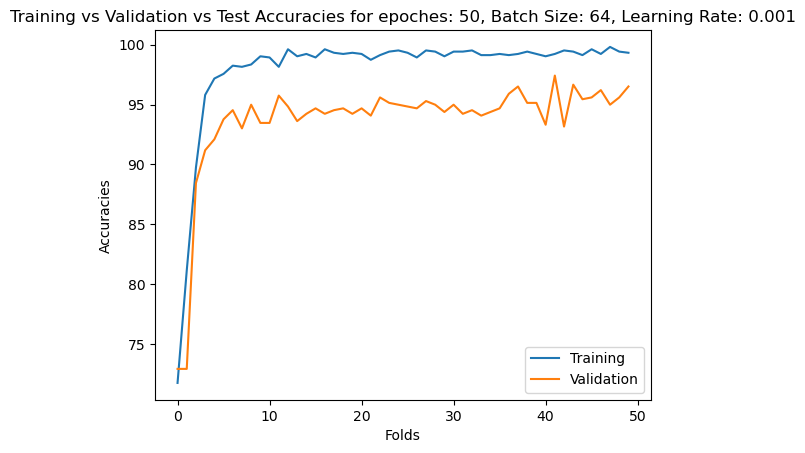

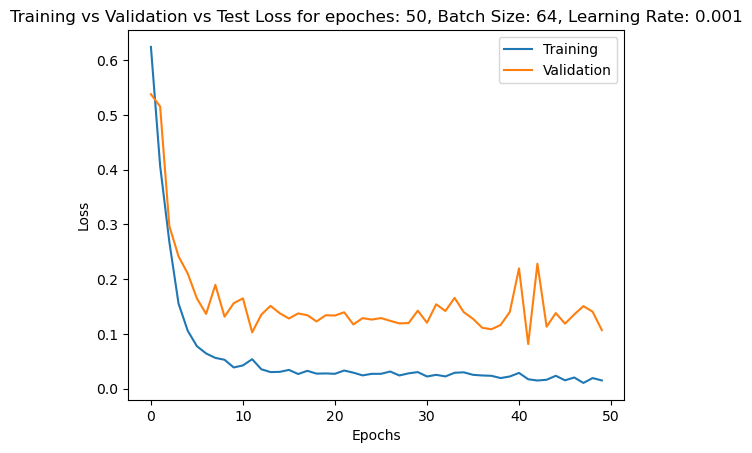

Learning Rate: 0.000 
Batch Size: 64 
Epoch size: 50 
Epoch: 1 
Training Data: Epoch Loss: 0.528, Epoch Accuracy: 81.152, Validation Loss: 0.590,Validation Accuracy: 72.948
Epoch: 2 
Training Data: Epoch Loss: 0.488, Epoch Accuracy: 81.152, Validation Loss: 0.554,Validation Accuracy: 72.948
Epoch: 3 
Training Data: Epoch Loss: 0.473, Epoch Accuracy: 81.152, Validation Loss: 0.550,Validation Accuracy: 72.948
Epoch: 4 
Training Data: Epoch Loss: 0.462, Epoch Accuracy: 81.152, Validation Loss: 0.539,Validation Accuracy: 72.948
Epoch: 5 
Training Data: Epoch Loss: 0.451, Epoch Accuracy: 81.152, Validation Loss: 0.536,Validation Accuracy: 72.948
Epoch: 6 
Training Data: Epoch Loss: 0.442, Epoch Accuracy: 81.152, Validation Loss: 0.528,Validation Accuracy: 72.948
Epoch: 7 
Training Data: Epoch Loss: 0.435, Epoch Accuracy: 81.152, Validation Loss: 0.524,Validation Accuracy: 72.948
Epoch: 8 
Training Data: Epoch Loss: 0.425, Epoch Accuracy: 81.152, Validation Loss: 0.509,Validation Accuracy: 7

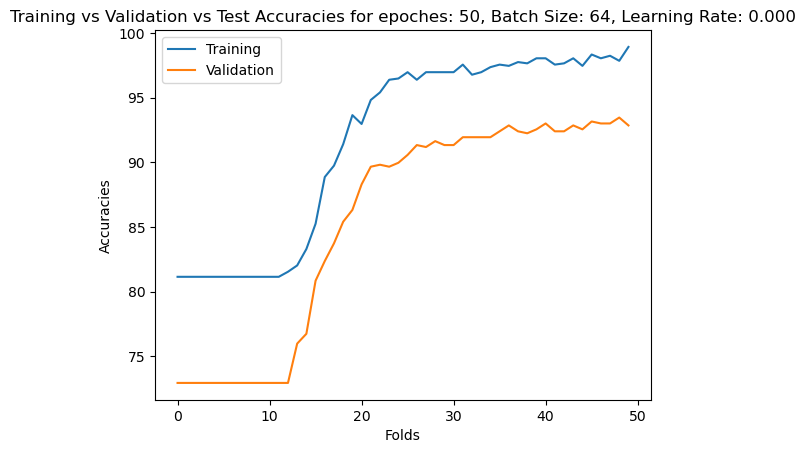

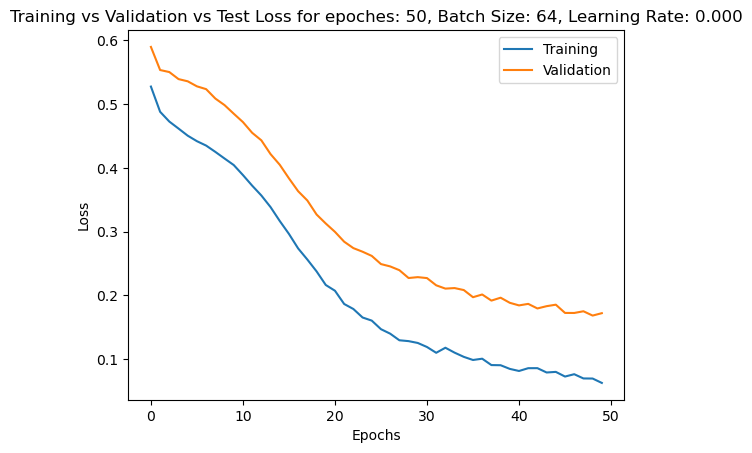

In [11]:
for n in lr:
    resnet18_Model = models.resnet18(pretrained=False, num_classes=2)
    resnet18_Model.to(device)
    print("Learning Rate: %.3f "%(n))
    optimizer = torch.optim.SGD(resnet18_Model.parameters(), lr=n,momentum=0.9)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0.0001)
    for Batch_size in Batchs:
        print("Batch Size: %d "%(Batch_size))
        training_loader=torch.utils.data.DataLoader(dataset=training_dataset,batch_size=Batch_size,shuffle=True,drop_last=False,num_workers=0)
        val_loader=torch.utils.data.DataLoader(dataset=validating_dataset,batch_size=Batch_size,shuffle=False,drop_last=False,num_workers=0)
        n_epochs=50
        print("Epoch size: %d "%(n_epochs))
        epoch_count = 0
        Accuracies = [] 
        valAccuracies = []
        valLoss = []
        trainLoss = []
        t1 = time.time()
        validation_accuracy = 0
        for epoch in range(n_epochs):
            print("Epoch: %d "%(epoch+1))
            resnet18_Model.train()
            running_loss=0.0
            running_correct=0.0
            val_loss=0.0
            total=0
            for i,data in enumerate(training_loader):
                images,labels=data
                images=images.to(device)
                labels=labels.to(device)
                total+=labels.size(0)
                optimizer.zero_grad()
                outputs=resnet18_Model(images)
                _,predicted=torch.max(outputs.data,1)
                loss=criterion(outputs,labels)
                loss.backward()
                optimizer.step()
                running_loss+=loss.item()
                running_correct+=(labels==predicted).sum().item()
                traning_accuracy=(running_correct/total)*100
                    
            validation_accuracy=0
            resnet18_Model.eval()
            with torch.no_grad():
                val_correct=0
                val_total=0
                val_loss=0
                for data in val_loader:
                    images,val_labels=data[0].to(device), data[1].to(device)
                    images = images.to(device)
                    val_labels = val_labels.to(device)
                    outputs=resnet18_Model(images)
                    loss_val=criterion(outputs,val_labels)
                    val_loss+= loss_val.item()
                    _,predicted=torch.max(outputs.data,1)
                    val_correct+=(predicted == val_labels).sum().item()
                    val_total+=val_labels.size(0)
                validation_accuracy = (val_correct / val_total) *100
                    
            scheduler.step()
            epoch_loss=running_loss/len(training_loader)
            val_loss=val_loss/len(val_loader)
            epoch_accuracy=100.00* running_correct/total
            Accuracies.append(epoch_accuracy)
            valAccuracies.append(validation_accuracy)
            trainLoss.append(epoch_loss)
            valLoss.append(val_loss)
                
                
            print("Training Data: Epoch Loss: %.3f, Epoch Accuracy: %.3f, Validation Loss: %.3f,Validation Accuracy: %.3f"%(epoch_loss,epoch_accuracy,val_loss,validation_accuracy))
           
        
        print("######## epoch Finished in {} seconds ###########".format(time.time()\
                                                                    -t1))
        epoch_count+=n_epochs
        torch.save(resnet18_Model.state_dict(), "2-Class-Resnet18-"+str(epoch)+"_"+str(Batch_size)+"_"+str(n)+"-epoch.pt")
            
        plt.plot(range(n_epochs),Accuracies, label="Training")
        plt.plot(range(n_epochs),valAccuracies, label="Validation")
        plt.xlabel("Folds")
        plt.ylabel("Accuracies")
        plt.title("Training vs Validation vs Test Accuracies for epoches: %d, Batch Size: %d, Learning Rate: %.3f" % (n_epochs, Batch_size, n))
        plt.legend()
        plt.show()
            
        plt.plot(range(n_epochs),trainLoss, label="Training")
        plt.plot(range(n_epochs),valLoss, label="Validation")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training vs Validation vs Test Loss for epoches: %d, Batch Size: %d, Learning Rate: %.3f" % (n_epochs, Batch_size, n))
        plt.legend()
        plt.show()
        
        lr_accuract_training.append(mean(Accuracies))
        lr_accuracy_val.append(mean(valAccuracies))
        lr_loss_train.append(mean(trainLoss))
        lr_loss_val.append(mean(valLoss))
            
        val=mean(valAccuracies)
        #Save the best model
        if val>best_accuracy:
            torch.save(resnet18_Model.state_dict(),'best_checkpoint.model')
            best_accuracy=val
            best_param="Learning Rate: "+str(n)+" Batch Size: "+str(Batch_size)+" "

In [12]:
len(lr_accuract_training)
len(lr_accuracy_val)

5

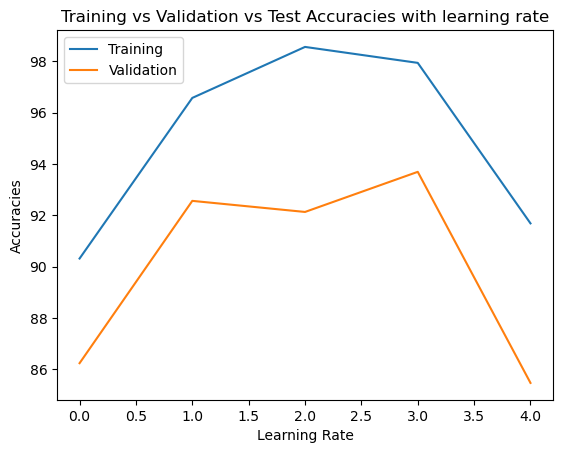

In [14]:
plt.plot(range(5),lr_accuract_training, label="Training")
plt.plot(range(5),lr_accuracy_val, label="Validation")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracies")
plt.title("Training vs Validation vs Test Accuracies with learning rate")
plt.legend()
plt.show()

In [ ]:
plt.plot(range(10),lr_loss_train, label="Training")
plt.plot(range(10),lr_loss_val, label="Validation")
plt.xlabel("Folds")
plt.ylabel("Accuracies")
plt.title("Training vs Validation vs Test Loss with learning rate")
plt.legend()
plt.show()

In [ ]:
print(best_param)

In [ ]:
model_path = 'best_checkpoint.model'

In [ ]:
state_dict = torch.load(model_path)

In [ ]:
model = models.resnet18(pretrained=False, num_classes=2)
model.to(device)

In [ ]:
model.load_state_dict(state_dict)

In [ ]:
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32, shuffle=False)

In [ ]:
def evaluate_model(model,test_loader):
    model.eval()
    predicted_correct =0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            images = images.to(device)
            labels = labels.to(device)
            total+=labels.size(0)
            outputs = model(images)
            _,predicted = torch.max(outputs,1)
            predicted_correct += (predicted == labels).sum().item()
    epoch_accuracy = 100.0* predicted_correct/total
    print("Testing Data: Epoch Accuracy: %.3f"%(epoch_accuracy))
    return epoch_accuracy

In [ ]:
evaluate_model(model,testing_loader)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [ ]:
y_pred = []
y_true = []

for data in testing_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        output = resnet18_Model(inputs) 
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) 
        labels = labels.data.cpu().numpy()
        y_true.extend(labels)

In [ ]:
classes = (0,1)
confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred),display_labels=classes)
fig,ax = plt.subplots()
fig.set_size_inches(13,13)
plt.title("Confusion Matrix ResNet 34 (2-Classes)")
disp.plot(ax=ax)
plt.show()

In [ ]:
print("Precision Macro:{:.2f}".format(precision_score(y_true, y_pred, average='macro')))
print("Precision Micro:{:.2f}".format(precision_score(y_true,y_pred,average='micro')))
print("Recall Macro:{:.2f}".format(recall_score(y_true,y_pred,average='macro')))
print("Recall Micro:{:.2f}".format(recall_score(y_true,y_pred,average='micro')))
print("F1-Score Macro:{:.2f}".format(f1_score(y_true,y_pred,average='macro')))
print("F1-Score Micro:{:.2f}".format(f1_score(y_true,y_pred,average='micro')))